# Can you estimate the age of an abalone?

##  👩🏼‍💼 Introduction
-- Backgrounds
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 🚧 Loading packages

In [1]:
pip install category_encoders 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 91.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 114.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 49.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 55.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.7/500.7 kB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 2

In [2]:
pip install colored

  Preparing metadata (setup.py) ... done
  Created wheel for colored: filename=colored-1.4.3-py3-none-any.whl size=14323 sha256=66e6f48a7da4ea66db084e02730f0f06a008e0efe2ff91d8a0e44bf8349710f6
  Stored in directory: /home/repl/.cache/pip/wheels/b3/cf/a4/23200f342c1291c99b34a54e4997a6cd9ed23f58a924ddaa49
Successfully built colored
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/li

In [3]:
import pandas as pd
import numpy as np

from termcolor import colored
from colored import fore, back, style

import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor

from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

from sklearn.pipeline import make_pipeline,Pipeline

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

import category_encoders as ce

import xgboost as xgb
from sklearn.linear_model import LinearRegression,Lasso,Ridge

from sklearn.metrics import mean_squared_error, r2_score

## 💾 Loading data

In [4]:
abalone = pd.read_csv('./data/abalone.csv')
abalone.head()


,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


<b><ins>Abalone characteristics</ins></b>:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

In [5]:
# Check missing value

abalone.isna().sum()

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

👩🏼‍🏫 <b><ins>Constat</ins></b>:<br><br>
$\;\;\;\;\;\;\;\;$➜ Abalone dataset does <b>not have missing value</b>.

## 🏄🏼‍♀️ Let's go to the analysis

### <ins>Part A : How does weight change with age for each of the three sex categories?</ins>

📖 <b><ins>Description</ins></b><br><br>
📍 <ins>There are <b>3 sex categories</b></ins> that we have to consider with different weights:<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Sexes : Male,female and infant<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Weights: Whole,shucked,viscera and shell.<br><br>

📍 <ins>What are we trying to find</ins>?<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ How does weight change with age for each of the three sex categories?<br><br>

📍 <ins>What will be the stages</ins>?<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ A graphique visualization : Scatterplot<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ A statistic test to refute or confirm the hypothesis.<br><br>

                           🧮ScatterPlot :  Weight by age and sex category


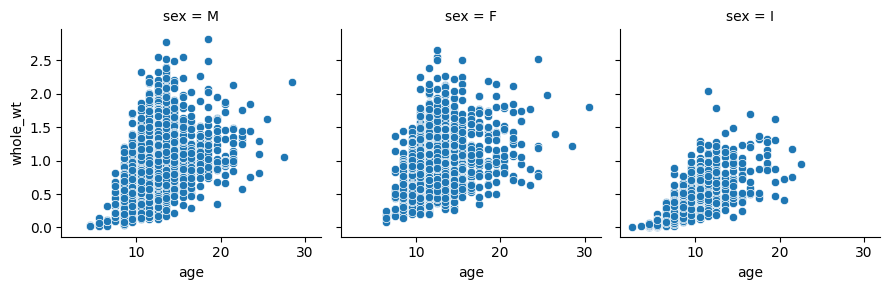

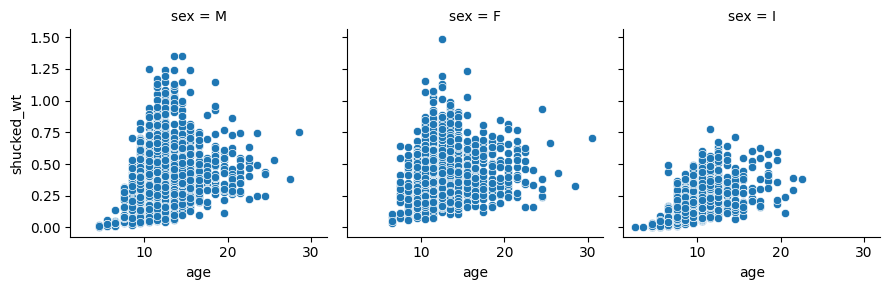

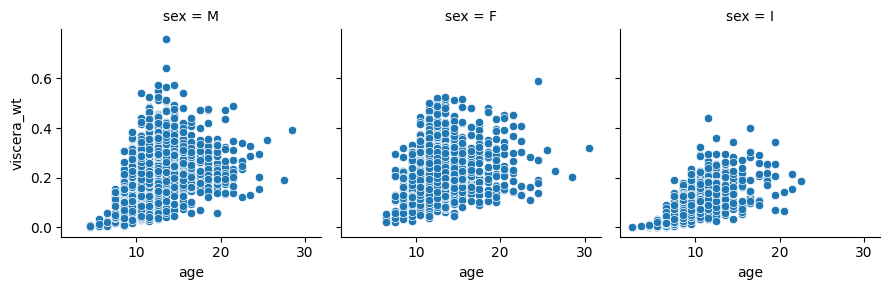

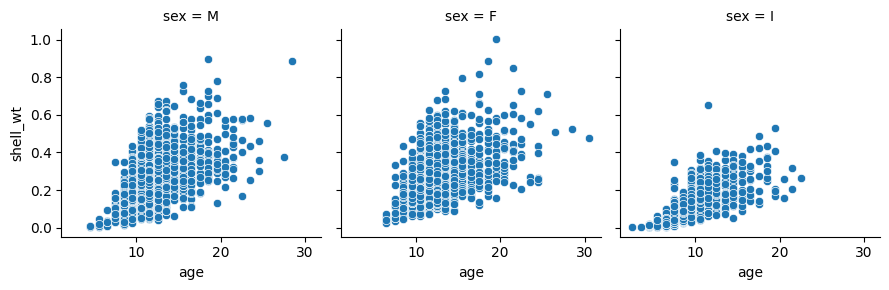

In [6]:
print(colored('                           🧮ScatterPlot :  Weight by age and sex category','grey',attrs=['bold']))
for column_ in abalone.columns[4:8]:
    g = sns.FacetGrid(abalone, col="sex")
    g.map(sns.scatterplot,'age', column_)
    plt.show()

👩🏼‍🏫 <b><ins>Constat</ins></b>:<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ The weight of abalone seems to <b>increase positively</b> with age and that whatever the sex category.<br><br>
    🔎 <b><ins>How could this be proven?</ins></b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ The solution is to use a <b>correlation test</b>.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ The most well-known is the <b>Pearson correlation test</b>,but the calculation of the p-value relies on the assumption that variable is <b>normally distributed.</b><br><br>
    👉🏼<b><ins>First stage</ins></b>: <br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Determine if each variable is <b>normally distributed</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ We can use the <b>shapiro test</b> that can be use until n is inferior at 5000.<br><br>
👉🏼<b><ins>Second stage</ins></b>:<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Use a corralation test.<br><br>   
$\;\;\;\;\;\;\;\;\;\;$➜ The test used depends on the result of shapiro test:<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ If the variable have a normal distribution we use : <b>Pearson test</b><br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ If If the variable have not a normal distribution we use : <b>Kendaull test</b>

In [7]:
# Testing normality distribution

for column_ in abalone.columns[4:8]:
    if sp.stats.shapiro(abalone[column_])[1]<0.05:
        print('⇢ The distribution of '+column_+' is not normal.')
    else:
        print('⇢ The distribution of '+column_+' is normal')

⇢ The distribution of whole_wt is not normal.
⇢ The distribution of shucked_wt is not normal.
⇢ The distribution of viscera_wt is not normal.
⇢ The distribution of shell_wt is not normal.


👩🏼‍🏫 <b><ins>Constat</ins></b>:<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Because any variable has a normal distribution, a <b>non-parametric test</b> must be used to verify the correlation.

🔎 <b><ins>Kendaull correlation test</ins> </b>:<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ The <b>null hypothesis</b> is that the variables have <b>no relationship</b>.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ The <b>alternative hypothesis</b> is that the variables are <b>correlated</b>.<br><br>
📏 <b><ins>Rules</ins></b>:<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ A p-value <b>less than 0.05</b> is statistically significant.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ There is less than a 5% probability the null hypothesis is correct<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ It indicates <b>strong evidence against the null hypothesis</b>.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Therefore, we <b>reject the null hypothesis</b>, and accept the alternative hypothesis.

In [8]:

for sex_ in (np.unique(abalone['sex'])):
    for column_ in abalone.columns[4:8]:
        corr_,p_val=stats.kendalltau(abalone[abalone['sex']==sex_]['age'],abalone[abalone['sex']==sex_][column_])
        if p_val<0.05 and corr_>0:
            print('✔️ The p-value is smaller then 0.05, we do reject the null hypothesis.'+'\n'+'⇢ Hence, '+
                  column_+' and age are positively correlated for the '+sex_+' sex category'+'\n')
        elif p_val<0.5 and corr_<0:
            print('✔️ The p-value is smaller then 0.05, we do reject the null hypothesis.'+'\n'+'⇢ Hence, '+
                  column_+' and age are negatively correlated for the '+sex_+' sex category'+'\n')
        else:
            print('❌ The p-value is bigger then 0.05, we do not reject the null hypothesis.'+'\n'+'⇢ Hence, '+
                  column_+' and age are not correlated for the '+sex_+' sex category'+'\n')

✔️ The p-value is smaller then 0.05, we do reject the null hypothesis.
⇢ Hence, whole_wt and age are positively correlated for the F sex category

✔️ The p-value is smaller then 0.05, we do reject the null hypothesis.
⇢ Hence, shucked_wt and age are positively correlated for the F sex category

✔️ The p-value is smaller then 0.05, we do reject the null hypothesis.
⇢ Hence, viscera_wt and age are positively correlated for the F sex category

✔️ The p-value is smaller then 0.05, we do reject the null hypothesis.
⇢ Hence, shell_wt and age are positively correlated for the F sex category

✔️ The p-value is smaller then 0.05, we do reject the null hypothesis.
⇢ Hence, whole_wt and age are positively correlated for the I sex category

✔️ The p-value is smaller then 0.05, we do reject the null hypothesis.
⇢ Hence, shucked_wt and age are positively correlated for the I sex category

✔️ The p-value is smaller then 0.05, we do reject the null hypothesis.
⇢ Hence, viscera_wt and age are positivel

👩🏼‍🏫 <b><ins>To conclude on this point</ins> : How does weight change with age for each of the three sex categories?</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ It can be concluded that all different weights have a positive correlation with age.<br>
    

### <ins>Part B : Can you estimate an abalone's age using its physical characteristics?</ins>

📚 <b>How determine wich algorithm to be used?</b><br><br>
$\;\;\;\;\;\;$📍<b>Unsuperviser or supervised</b>:<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ We <b>know the target</b>, so it is a <em><b>supervised</em></b> problem<br><br>
$\;\;\;\;\;\;$📍<b>Regression or Classification</b>:<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ The target is <b>numerical</b>,It is a <em><b>regression</em></b> problem

🧱 <b>The different stages</b><br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$⚀ Separate Predictors(X) and Target (y)<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$⚁ Split the data in train set and test set<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$⚂ Preprocessing<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$⚃ Train the model and test the model<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$⚄ Choose the best model<br><br>

In [9]:

# Split data X: Features and y : the target

X=abalone.iloc[:,0:-2]
y=abalone.iloc[:,-1]

# Feature names and target name

print('Feature names: ',np.unique(X.columns))
print('\n Target name :',abalone.columns[-1])

Feature names:  ['diameter' 'height' 'length' 'sex' 'shell_wt' 'shucked_wt' 'viscera_wt'
 'whole_wt']

 Target name : age


☢️ <b>Caution</b>

$\;\;\;\;\;\;\;\;\;\;$➜ In order to avoid <b>leakage</b>, we drop the feature Rings

$\;\;\;\;\;\;\;\;\;\;$➜ Use this variable as feature is like using a target as feature.

In [10]:
# Split data into train and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=39)

In [11]:
# Split categorical variables and numerical variables

numerical_features=make_column_selector(dtype_include=np.number)

categorical_features=make_column_selector(dtype_exclude=np.number)

🧱 <b>Steps of preprocessing</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Handling with missing value : no need<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b>Encoding</b> the categorical data with <b>CatBoostEncoder</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Make data <b>more normal</b> with <b>PowerTransformer</b> and parameter <b>'method'</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Features <b>scaling</b> with <b>PowerTransformer</b> and parameter <b>'standardize'</b><br><br>

🙋🏼 <b>Explain my choices</b><br><br>
$\;\;\;\;\;\;$📍 <b>Why use PowerTransformer for numerical data?</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ It makes data <b>more gaussian</b>.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ The method <b>'yeo-johnson'</b> supports both <b>positive or negative</b> data
as well as 0.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ It will also <b>standardize data automatically</b> after processing, which means that each variable will have a zero mean and a unit variance.
<br><br>
$\;\;\;\;\;\;$📍 <b>Why use Cat boost encoder</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Many machine learning algorithms require data to be numeric.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ So, before training a model, we need to convert categorical data into numeric form.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Catboost is a <b>target-based categorical encoder</b>.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ It is a <b>supervised encoder</b> that <ins>encodes categorical columns according to the target value</ins>.<br><br> 
$\;\;\;\;\;\;\;\;\;\;$➜ It replaces a categorical feature with <b>average value of target</b> corresponding to that category in training dataset combined with the target probability over the entire dataset.

In [12]:
# Pipeline for numerical and categorical pipelines

numerical_pipeline=make_pipeline(PowerTransformer(method='yeo-johnson',standardize=True))

categorical_pipeline=make_pipeline(ce.CatBoostEncoder())

In [13]:
#Preprocessing for features

preprocessor=make_column_transformer((categorical_pipeline,categorical_features),
                                     (numerical_pipeline,numerical_features))


👩🏼‍💻 Which models will be tested<br><br>
$\;\;\;\;\;\;$📍 Selection of 4 regression models wich differents hyperparameters to be tested<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Ordinary least squares <br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Ridge<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Lasso<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ xgboost<br><br>

In [14]:
# Hyperparameters to be tested for each model

params_ols={'model__regressor__fit_intercept':[True,False]}

params_xgb= {"model__regressor__max_depth":    [3,4,5],
             "model__regressor__n_estimators": [20,50,100],
             "model__regressor__learning_rate": [0.1,0.01,0.001]}

params_ridge={'model__regressor__alpha':[0.001,0.002],
               'model__regressor__fit_intercept':[True,False]}

params_lasso={'model__regressor__alpha':[0.01,0.02,0.03]}

In [15]:
# Regression models to be tested

models_={'ols':{'model':LinearRegression(),'params':params_ols},
       'lasso':{'model':Lasso(),'params':params_lasso},
       'ridge':{'model':Ridge(),'params':params_ridge},
        'xgb':{'model':xgb.XGBRegressor(objective='reg:squarederror'),'params':params_xgb}}

👩🏼‍💻  <b><ins>Process</ins></b><br><br>
$\;\;\;\;\;\;$📍 Loop to call each model<br><br>
$\;\;\;\;\;\;$📍 <b>GridSearchCV</b> <ins>tunes hyperparameters</ins> in order to determine the optimal values for a given model :<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b>Preprocessor</b> in GridSearchcv corresponds to the <ins>transformations of the numerical and categorical predictors</ins>.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b>Model</b> is be used with <b>TransformedTargetRegressor</b>.<br><br>
 $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ <b>TransformedTargetRegressor</b> object <ins>wraps a given model and a <b>scaling output data</b></ins>.



📊📊📊📊📊📊📊📊📊📊 MODEL TESTED :OLS 📊📊📊📊📊📊📊📊📊


<Figure size 500x500 with 0 Axes>

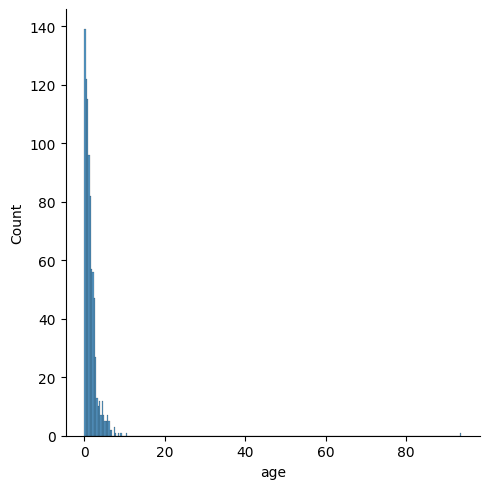

best Score N : 0.50
RMSE :  3.863288e+00
Median : 1.160870801591554


📊📊📊📊📊📊📊📊📊📊 MODEL TESTED :LASSO 📊📊📊📊📊📊📊📊📊


<Figure size 500x500 with 0 Axes>

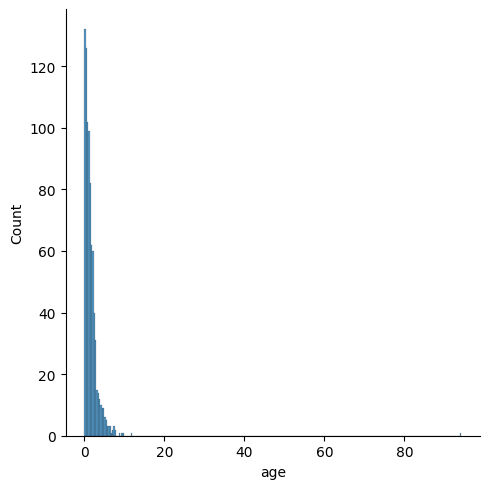

best Score N : 0.48
RMSE :  3.907155e+00
Median : 1.180252734859721


📊📊📊📊📊📊📊📊📊📊 MODEL TESTED :RIDGE 📊📊📊📊📊📊📊📊📊


<Figure size 500x500 with 0 Axes>

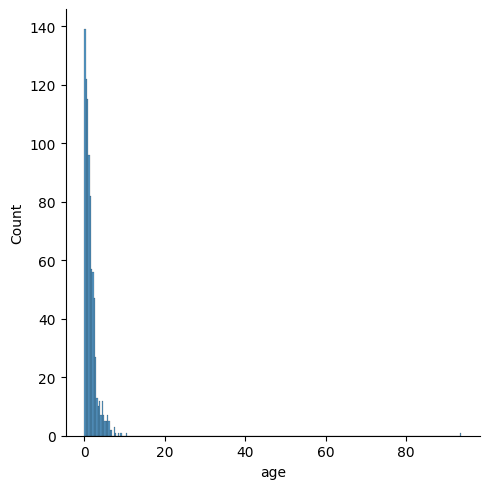

best Score N : 0.50
RMSE :  3.863313e+00
Median : 1.1608675489959825


📊📊📊📊📊📊📊📊📊📊 MODEL TESTED :XGB 📊📊📊📊📊📊📊📊📊


<Figure size 500x500 with 0 Axes>

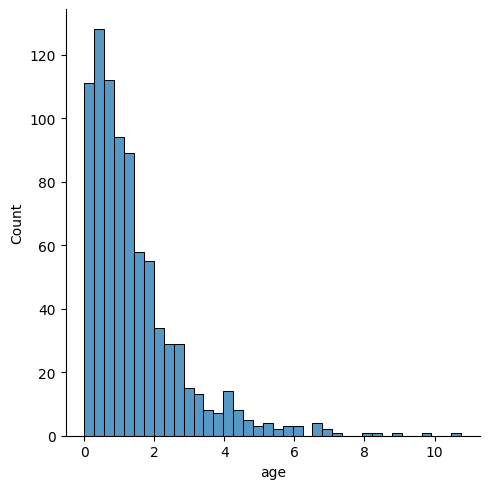

best Score N : 0.53
RMSE :  2.006237e+00
Median : 1.0708107948303223


CPU times: user 1min 17s, sys: 6.64 s, total: 1min 24s
Wall time: 45.4 s


In [16]:
%%time
for model_ in models_.keys():
    
    model = TransformedTargetRegressor(regressor=models_[model_]['model'],
                                       transformer=PowerTransformer(standardize=True))
    
    pipe = Pipeline(steps=[('preprocessor',preprocessor),('model', model)])
    
    ## GridSearch CV
    
    search=GridSearchCV(estimator=pipe,param_grid=models_[model_]['params'],cv=5)
    search.fit(X_train,y_train)
    
    model_best_param=search.best_estimator_
    
    # Predict y with best params with each model
    y_preds=model_best_param.predict(X_test)
    
    print('📊📊📊📊📊📊📊📊📊📊 MODEL TESTED :'+model_.upper()+' 📊📊📊📊📊📊📊📊📊')
    #Plot error
    plt.figure(figsize=(5,5))
    erreur_hist=np.abs(y_test-y_preds)
    sns.displot(erreur_hist)
    plt.show();
    
    print('best Score N :' ,"{:,.2f}".format(search.best_score_))
    print('RMSE : ',"{:e}".format(np.sqrt(mean_squared_error(y_test,y_preds))))
    print('Median :',np.median(erreur_hist))
    print('\n')
    

🎊 <b><ins>What is the best model</ins>?</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Let's have look with the attribut 'best_estimator'

In [17]:
# Best model

final_model=search.best_estimator_
final_model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('catboostencoder',
                                                                   CatBoostEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f21d6ce6a90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector objec...
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.1,
                                                                   max_bin=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=3,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   n_estimators=100,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=None,
                                                                   reg_alpha=None,
                                                                   reg_lambda=None, ...),
                                            transformer=PowerTransformer()))])

👩🏼‍🏫 <b><ins>To conclude on this point</ins> : Can you estimate an abalone's age using its physical characteristics?</ins></b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ The best model to be uses is <b>XGBoost Regressor</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b>R2</b> : 0.53 , that means that the model explains 53 per cent of the variance of the data<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b>RMSE</b> : On average, the prediction error is two years.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b>Median</b> : 50% of prediction errors are less than 1.07 years.

### <ins>Part C : Investigate which variables are better predictors of age for abalones</ins>.

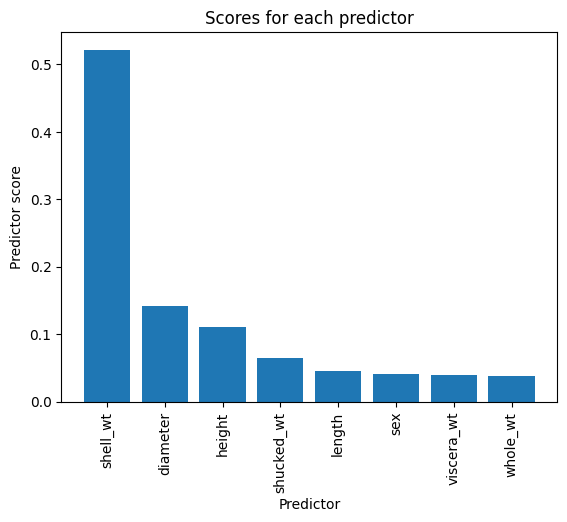

In [18]:
# Score for each predictors

data={'Predictors':np.array(X.columns),
      'Importance':final_model.named_steps['model'].regressor_.feature_importances_}

predictor_importance=pd.DataFrame(data).sort_values(by=['Importance'],ascending=False)

plt.bar(x=predictor_importance['Predictors'],height=predictor_importance['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Predictor')
plt.ylabel('Predictor score')
plt.title('Scores for each predictor')
plt.show()

📽 <b><ins>Zoom on predictors</b></ins><br><br>
$\;\;\;\;\;\;$📍 Let's use the attribut <b>features_importance</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Feature importance refers to techniques that <b>assign a score</b> to input predictors based on <ins>how useful they are at predicting a target variable</ins>.

👩🏼‍🏫 <b><ins>To conclude on this point</ins> : Which variables are better predictors of age for abalones</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜The most usefull predictor is the shell weight.